In [1]:
import tensorflow as tf

In [5]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [6]:
from zipfile import ZipFile

# Replace the path to your zip file and the directory where you want to extract the contents
zip_file_path = r"/content/drive/MyDrive/PCOS_Detection/pcosProject/archive (26).zip"
extracted_dir = r"/content/drive/MyDrive/PCOS_Detection/extracted_dir"# Specify the directory where you want to extract

# Create a zip object and extract the contents to the specified directory
with ZipFile(zip_file_path, 'r') as zObject:
    zObject.extractall(path=extracted_dir)

In [7]:
train_directory = '/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/train'

In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


(343, 343, 3)


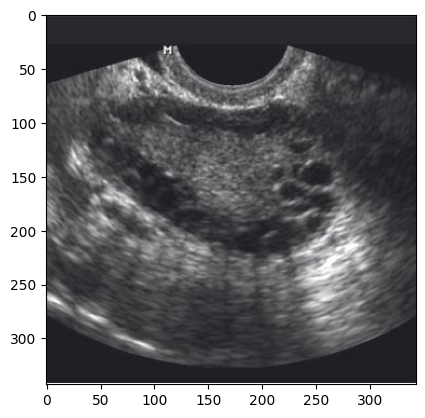

In [12]:
import matplotlib.pyplot as plt
img1 = cv2.imread("/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/train/infected/img1.jpg")
plt.imshow(img1)
print(img1.shape)

(300, 300, 3)


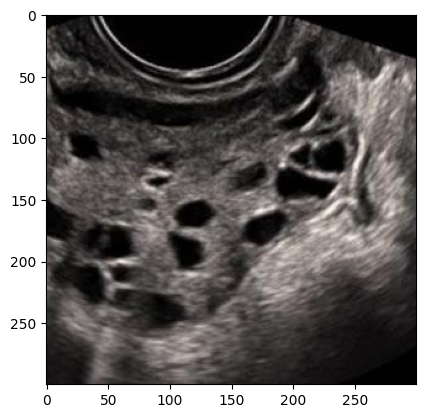

In [13]:
import matplotlib.pyplot as plt
img2 = cv2.imread("/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/train/infected/img_0_1869.jpg")
plt.imshow(img2)
print(img2.shape)

In [26]:
import pathlib
infected = pathlib.Path('/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/train/infected')
non_infected = pathlib.Path('/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/train/notinfected')

In [27]:
resized_infected = pathlib.Path('/content/drive/MyDrive/PCOS_Detection/resized_infected')
resized_non_infected = pathlib.Path('/content/drive/MyDrive/PCOS_Detection/resized_noninfected')

In [29]:
for filename in os.listdir(infected):
  if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
    img = cv2.imread(os.path.join(infected, filename))
    rezimg=cv2.resize(img,(224,224))
    output_path=os.path.join(resized_infected,filename)
    cv2.imwrite(output_path,rezimg)

In [30]:
for filename in os.listdir(non_infected):
  if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
    img = cv2.imread(os.path.join(non_infected, filename))
    rezimg=cv2.resize(img,(224,224))
    output_path=os.path.join(resized_non_infected,filename)
    cv2.imwrite(output_path,rezimg)

In [32]:
# List of disease type directories
pcos_type = [resized_infected, resized_non_infected]

# Create a list to collect data
data = []

# Loop through the disease type directories
from tqdm import tqdm
for pcos_dir in pcos_type:
    for image_path in tqdm(list(pcos_dir.iterdir()), desc=str(pcos_dir)):
        data.append({'image': str(image_path), 'pcos_type': pcos_type.index(pcos_dir)})

# Create the DataFrame outside the loop
df = pd.DataFrame(data)

# Verify the resulting DataFrame
print(df.head())

/content/drive/MyDrive/PCOS_Detection/resized_infected: 100%|██████████| 781/781 [00:00<00:00, 237149.89it/s]
/content/drive/MyDrive/PCOS_Detection/resized_noninfected: 100%|██████████| 1143/1143 [00:00<00:00, 242972.45it/s]

                                               image  pcos_type
0  /content/drive/MyDrive/PCOS_Detection/resized_...          0
1  /content/drive/MyDrive/PCOS_Detection/resized_...          0
2  /content/drive/MyDrive/PCOS_Detection/resized_...          0
3  /content/drive/MyDrive/PCOS_Detection/resized_...          0
4  /content/drive/MyDrive/PCOS_Detection/resized_...          0


In [33]:
df.tail(5)

,image,pcos_type
1919,/content/drive/MyDrive/PCOS_Detection/resized_...,1
1920,/content/drive/MyDrive/PCOS_Detection/resized_...,1
1921,/content/drive/MyDrive/PCOS_Detection/resized_...,1
1922,/content/drive/MyDrive/PCOS_Detection/resized_...,1
1923,/content/drive/MyDrive/PCOS_Detection/resized_...,1


Files in directory: ['test', 'train']


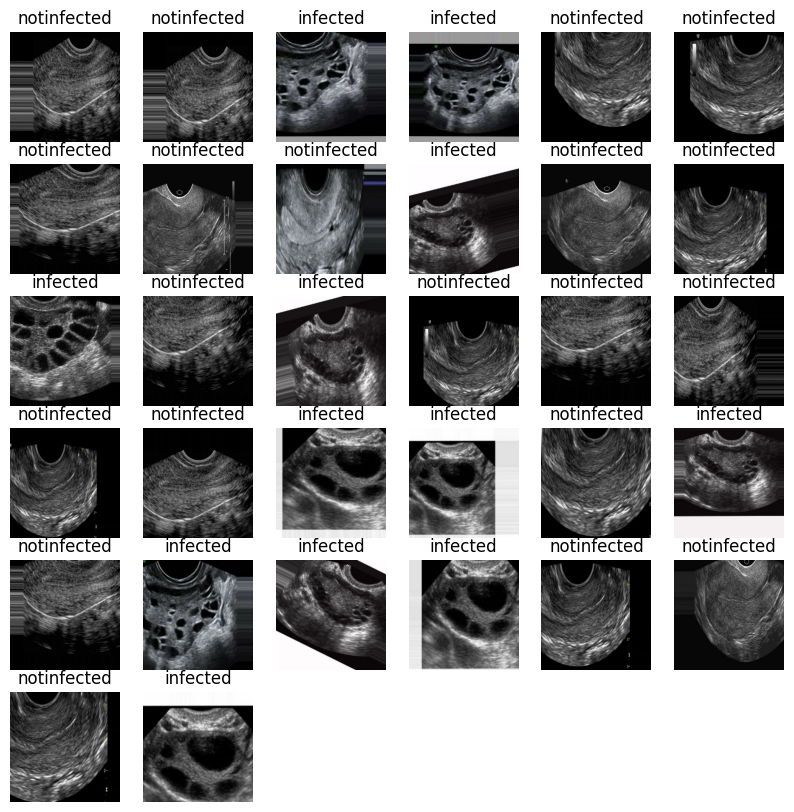

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
train_it = datagen.flow_from_directory( train_directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
val_it = datagen.flow_from_directory( train_directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [37]:
batchX, batchy = train_it.__next__()
print('Batch shape = %s, min=%.3f, max=%.3f' % (batchy.shape,batchy.min(),batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape,batchX.min(),batchX.max()))

Batch shape = (100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


(224, 224, 3)


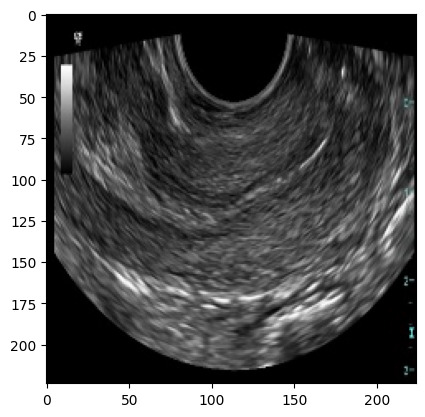

In [38]:
img1= cv2.imread("/content/drive/MyDrive/PCOS_Detection/resized_noninfected/img1.jpeg")
plt.imshow(img1)
print(img1.shape)

(224, 224, 3)


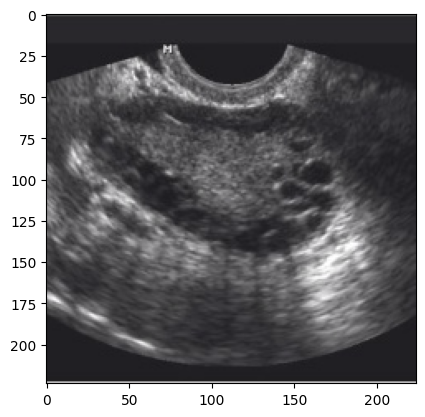

In [39]:
img2= cv2.imread("/content/drive/MyDrive/PCOS_Detection/resized_infected/img1.jpg")
plt.imshow(img2)
print(img2.shape)

In [40]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [43]:
Pcos = Sequential()
Pcos.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
Pcos.add(MaxPooling2D(pool_size=(4,4)))

Pcos.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
Pcos.add(MaxPooling2D(pool_size=(4,4)))

Pcos.add(Flatten())

Pcos.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
Pcos.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 220, 220, 10)        │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 55, 55, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 51, 51, 12)          │           3,012 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1728)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           3,458 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,230 (28.24 KB)

 Trainable params: 7,230 (28.24 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.losses import CategoricalCrossentropy
Pcos.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [48]:
history = Pcos.fit(
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6026 - loss: 0.6498

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.6067 - loss: 0.6468 - val_accuracy: 0.8403 - val_loss: 0.4841
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.8444 - loss: 0.4333 - val_accuracy: 0.8611 - val_loss: 0.3102
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.8804 - loss: 0.3082 - val_accuracy: 0.8906 - val_loss: 0.2768
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9212 - loss: 0.1880 - val_accuracy: 0.9566 - val_loss: 0.1444
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9519 - loss: 0.1447 - val_accuracy: 0.9774 - val_loss: 0.0980


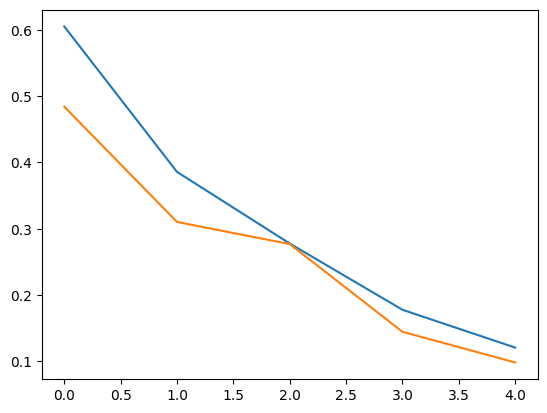

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [50]:
Pcos.save('pcos.h5')

In [51]:
from tensorflow import keras
model = keras.models.load_model('pcos.h5')

In [62]:
from keras.preprocessing.image import load_img
import cv2
import numpy as np

# Define class labels and their corresponding names
class_labels = {0: 'infected', 1: 'non_infected'}

# Model loading (Make sure you load your trained model before this line)
# model = keras.models.load_model('path_to_your_model.h5')

image_path = '/content/drive/MyDrive/PCOS_Detection/extracted_dir/data/test/notinfected/img_0_100.jpg'

try:
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        raise Exception(f"Cannot open or find the image: {image_path}")

    # Convert to RGB if the image is grayscale
    if len(image.shape) == 2:  # Check if image is grayscale
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Resize the image
    image = cv2.resize(image, (224, 224))

    # Normalize pixel values to be between 0 and 1
    image = image / 255.0

    # Reshape image for prediction (add batch dimension)
    image = image.reshape(1, 224, 224, 3)

    # Make the prediction
    prediction = model.predict(image)

    # Get the predicted class index (class with the highest probability)
    predicted_class = np.argmax(prediction)

    # Get the class name from the label
    predicted_class_name = class_labels[predicted_class]

    # Print the predicted class with its label
    print(f'Predicted Class: {predicted_class_name} (Label: {predicted_class})')

except Exception as e:
    print(f"Error occurred: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Class: non_infected (Label: 1)
